<a href="https://colab.research.google.com/github/bislara/Multi_Output_Regression/blob/master/multi_regression_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('/content/drive/My Drive/multi_output_regression/Dataset.csv')


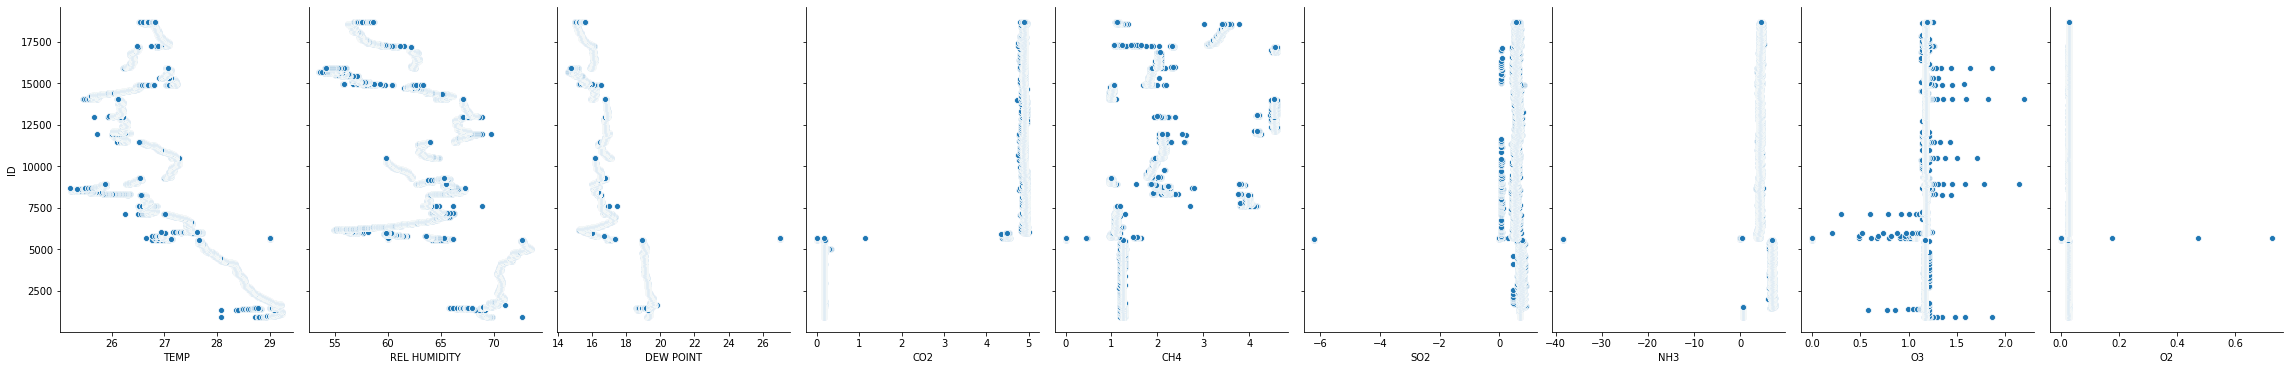

In [2]:
#plotting the datas
import seaborn as sns
sns.pairplot(dataset, x_vars=['TEMP','REL HUMIDITY','DEW POINT','CO2','CH4','SO2','NH3','O3','O2'], y_vars = 'ID', height=5, aspect=0.7)

dataset.drop(["ID"], axis = 1, inplace = True) 

X = dataset.iloc[:, 0:9].values
y = dataset.iloc[:, 9:12].values


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [0]:
import torch

In [0]:
# n_train = X_train.shape[0]
# X_train = torch.tensor(X_train, dtype=torch.float)
# X_test = torch.tensor(X_test, dtype=torch.float)
# y_train = torch.tensor(y_train, dtype=torch.float)
# y_test = torch.tensor(y_test, dtype=torch.float)

In [5]:
print(y_test,y_train)

[[  0.438       88.          22.61485556]
 [  0.4284      74.          21.06983333]
 [  0.4558     149.          30.06654444]
 ...
 [  0.4452      91.          22.71773333]
 [  0.4328     139.          28.71488889]
 [  0.4433     128.          22.471     ]] [[  0.4353     129.          27.43177778]
 [  0.4351     110.          24.24585556]
 [  0.4331     139.          23.53647273]
 ...
 [  0.4331     105.          24.52685556]
 [  0.4304     138.          28.5511    ]
 [  0.4248     192.          34.76081111]]


In [0]:
import torch.nn.functional as F

torch.set_default_dtype(torch.float64)
class RegressionModel(torch.nn.Module): 
  
    def __init__(self): 
        super(RegressionModel, self).__init__() 
        self.linear1 = torch.nn.Linear(9, 256)   
        self.linear2 = torch.nn.Linear(256,128)   
        self.linear3 = torch.nn.Linear(128,64)   
        self.linear4 = torch.nn.Linear(64,3)   


    def forward(self, x): 
        x = F.relu(self.linear1(x)) 
        x = F.relu(self.linear2(x)) 
        x = F.relu(self.linear3(x)) 
        x = self.linear4(x)
        
        return x

In [0]:
# our model 
net = RegressionModel() 
  
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(net.parameters(), lr = 0.00001) 

In [0]:
from torch.utils.data import TensorDataset, DataLoader
dataset = TensorDataset(torch.from_numpy(X_train).clone(), torch.from_numpy(y_train).clone())
trainloader = DataLoader(dataset=dataset, batch_size=4, shuffle=True)

testset = TensorDataset(torch.from_numpy(X_test).clone(), torch.from_numpy(y_test).clone())
testloader = DataLoader(dataset=testset, batch_size=4, shuffle=True)

In [0]:
step = 0
loss_train = []
loss_val = []
min_loss = 1000
patience = 50
training_loss_store = []
validation_loss_store = []

import os
import time

In [11]:
print('training started.............................................')
start_time = time.time()
for epoch in range(200):  # loop over the dataset multiple times
    running_loss = 0.0
    loop_no=0
    for x,y in trainloader:
        step+=1
        loop_no+=1
        # zero the parameter gradients
        optimizer.zero_grad()
        
        loss = criterion(y, net(x))
        loss_train.append(loss.item())
        training_loss_store.append([epoch, loss.item()])

        loss.backward()
        optimizer.step()   

        # print statistics
        running_loss += loss.item()
        if loop_no % 10 == 9:    # print every 10 mini-batches
            print('[%d, %5d] loss: %.3f' %(epoch + 1, loop_no + 1, running_loss / 10))
            loss_train = []
            running_loss = 0.0

    print('Finished training for epoch ' + str(epoch) + ' time taken = ' + str(time.time() - start_time))
    print('################################evaluation###########################\n')

    with torch.no_grad():
        val_loss = 0
        net.eval()
        loop_no = 0
        for x, y in testloader:
            step+=1
            loss = criterion(y, net(x))
            loss_val.append(loss.item())
            validation_loss_store.append([epoch, loss.item()])
            val_loss += loss
            loop_no+=1

        val_loss = val_loss/float(loop_no + 1)
        
        if val_loss < min_loss:
            min_loss = val_loss
            no_impr_epoch = 0
            
            #save the best model
            torch.save(net.state_dict(), 'training/epoch_' + str(epoch+1) + 'loss_' + str(val_loss) + '.pt')
            
            print('performance improved with validation loss ' + str(val_loss))
            loss_val = []
        else:
            no_impr_epoch += 1
            print('no improvement with prev best model ' + str(no_impr_epoch) + 'th')
            
        if no_impr_epoch > patience:
            print('stop training')
            break

print('Finished Training................................................')
end_time = time.time()


Streaming output truncated to the last 5000 lines.
[186,   580] loss: 26.687
[186,   590] loss: 69.712
[186,   600] loss: 41.636
[186,   610] loss: 54.805
[186,   620] loss: 20.446
[186,   630] loss: 31.964
[186,   640] loss: 37.721
[186,   650] loss: 64.524
[186,   660] loss: 46.025
[186,   670] loss: 25.368
[186,   680] loss: 29.517
[186,   690] loss: 21.112
[186,   700] loss: 39.581
[186,   710] loss: 56.435
[186,   720] loss: 30.666
[186,   730] loss: 25.504
[186,   740] loss: 51.139
[186,   750] loss: 40.133
[186,   760] loss: 56.371
[186,   770] loss: 25.019
[186,   780] loss: 17.498
[186,   790] loss: 40.969
[186,   800] loss: 29.508
[186,   810] loss: 51.221
[186,   820] loss: 37.524
[186,   830] loss: 41.240
[186,   840] loss: 29.058
[186,   850] loss: 19.481
[186,   860] loss: 31.600
[186,   870] loss: 26.051
[186,   880] loss: 39.294
[186,   890] loss: 21.561
[186,   900] loss: 27.595
[186,   910] loss: 59.912
[186,   920] loss: 34.935
[186,   930] loss: 47.757
[186,   940] 

In [24]:
PATH = "training/epoch_153loss_tensor(30.9623).pt"
model = RegressionModel()
model.load_state_dict(torch.load(PATH))
model.eval()

testing = TensorDataset(torch.from_numpy(X_test[25,:]).clone())
testingloader = DataLoader(dataset=testing, batch_size=1, shuffle=True)
# outputs = model(X_train[65,:])
dataiter = iter(testloader)
i,j=dataiter.next()
print(i[0],j[0])


tensor([2.7100e+01, 5.5720e+01, 1.5130e+01, 4.8746e+00, 1.8947e+00, 5.3000e-01,
        4.1400e+00, 1.1697e+00, 2.6900e-02]) tensor([ 0.4372, 96.0000, 22.4837])


In [25]:
print("Actual output is ",j[0])

y = model(i[0])
i = y.detach().numpy()
print("predicted output is ",i)

Actual output is  tensor([ 0.4372, 96.0000, 22.4837])
predicted output is  [ 0.43250422 97.5754219  23.02367482]
